In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CreditRisk_Loan.csv')

# Preview the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80471 entries, 0 to 80470
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           80471 non-null  int64  
 1   member_id                    80471 non-null  int64  
 2   loan_amnt                    80471 non-null  int64  
 3   funded_amnt                  80471 non-null  int64  
 4   funded_amnt_inv              80471 non-null  float64
 5   term                         80471 non-null  object 
 6   int_rate                     80471 non-null  float64
 7   annual_inc                   80471 non-null  float64
 8   installment                  80471 non-null  float64
 9   grade                        80471 non-null  object 
 10  sub_grade                    80471 non-null  object 
 11  emp_title                    75648 non-null  object 
 12  emp_length                   77260 non-null  object 
 13  home_ownership  

Data Cleaning

In [3]:
# Check for missing values
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
annual_inc                         0
installment                        0
grade                              0
sub_grade                          0
emp_title                       4823
emp_length                      3211
home_ownership                     0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
desc                           47345
purpose                            0
title                             10
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       10
earliest_cr_line                  10
inq_last_6mths                    10
m

In [4]:
# Select columns by data type

# Select columns that are of type 'int64' and 'float64'
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Select columns that are of type 'object'
object_columns = df.select_dtypes(include=['object'])

In [5]:
# Print unique values count for object columns
for col in object_columns.columns:
    print(f"{col}: {len(df[col].unique())}")

term: 2
grade: 7
sub_grade: 35
emp_title: 52795
emp_length: 12
home_ownership: 5
verification_status: 3
issue_d: 82
loan_status: 9
pymnt_plan: 2
desc: 32962
purpose: 14
title: 22131
zip_code: 846
addr_state: 50
earliest_cr_line: 606
initial_list_status: 2
last_pymnt_d: 98
next_pymnt_d: 2
last_credit_pull_d: 99


In [6]:
# Handle Columns to Keep and Drop

# Columns to keep (adjust based on what is available in your dataset)
columns_to_keep = [
    'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
    'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status'
]

# Keep only the columns that are present in the dataset
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

# Columns to drop (adjust based on what is available in your dataset)
columns_to_drop = [
    'emp_title', 'issue_d', 'title', 'zip_code', 
    'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'
]

In [7]:
# Drop only the columns that are present in the dataset
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the unnecessary columns
data_cleaned = df.drop(columns=columns_to_drop)

# Keep only the desired columns
data_cleaned = data_cleaned[columns_to_keep + numeric_columns.columns.tolist()]

In [8]:
# Proceed with further analysis 
print("Cleaned Data:")
data_cleaned.head()

Cleaned Data:


,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,id,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,36 months,B,B3,< 1 year,RENT,Source Verified,Fully Paid,n,f,1220967,...,0.00,0.0,24243.64,0.0,NaN,1,0.0,NaN,NaN,NaN
1,36 months,B,B5,10+ years,RENT,Source Verified,Charged Off,n,f,1098463,...,12.09,0.0,672.58,0.0,NaN,1,0.0,NaN,NaN,NaN
2,36 months,E,E3,10+ years,RENT,Source Verified,Current,n,f,9866069,...,0.00,0.0,191.99,0.0,NaN,1,0.0,0.0,4606.0,4900.0
3,36 months,A,A2,10+ years,OWN,Not Verified,Fully Paid,n,f,1048435,...,0.00,0.0,43.59,0.0,NaN,1,0.0,NaN,NaN,NaN
4,36 months,A,A4,5 years,MORTGAGE,Not Verified,Fully Paid,n,f,2075919,...,0.00,0.0,7000.25,0.0,NaN,1,0.0,0.0,490431.0,120900.0


Exploratory Data Analysis (EDA)

In [9]:
# Descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
data_cleaned.describe()

Descriptive statistics for numeric columns:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,installment,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.047100e+04,8.047100e+04,80471.000000,80471.000000,80471.000000,80471.000000,8.047100e+04,80471.000000,80471.000000,80461.000000,...,80471.000000,80471.000000,80471.000000,80420.000000,12831.000000,80471.0,80461.000000,59374.000000,5.937400e+04,5.937400e+04
mean,8.456813e+06,9.533449e+06,13958.264468,13913.538107,13795.978760,13.771616,7.206383e+04,424.283896,16.724409,0.241210,...,105.337541,9.905199,3288.494159,0.004688,42.312213,1.0,0.002983,105.155186,1.384526e+05,3.038368e+04
std,1.102332e+07,1.178987e+07,8198.449857,8172.847094,8209.370961,4.377810,4.745103e+04,242.846590,7.746885,0.719828,...,622.149420,98.188923,5497.233191,0.073397,21.030296,0.0,0.058916,1241.290810,1.545133e+05,2.967780e+04
min,5.473400e+04,7.065100e+04,500.000000,500.000000,0.000000,5.420000,1.896000e+03,15.690000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.429712e+06,1.668809e+06,7750.000000,7750.000000,7500.000000,10.640000,4.500000e+04,246.835000,10.950000,0.000000,...,0.000000,0.000000,321.130000,0.000000,26.000000,1.0,0.000000,0.000000,2.824325e+04,1.400000e+04
50%,4.924661e+06,5.808763e+06,12000.000000,12000.000000,12000.000000,13.660000,6.200000e+04,376.450000,16.410000,0.000000,...,0.000000,0.000000,595.010000,0.000000,41.000000,1.0,0.000000,0.000000,8.088300e+04,2.310000e+04
75%,8.224888e+06,9.826884e+06,19800.000000,19600.000000,19425.000000,16.490000,8.650000e+04,556.260000,22.200000,0.000000,...,0.000000,0.000000,4001.450000,0.000000,59.000000,1.0,0.000000,0.000000,2.083130e+05,3.780000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1.440000e+06,1408.130000,39.990000,29.000000,...,31900.520000,7002.190000,36234.440000,4.000000,169.000000,1.0,3.000000,119428.000000,4.772549e+06,2.013133e+06


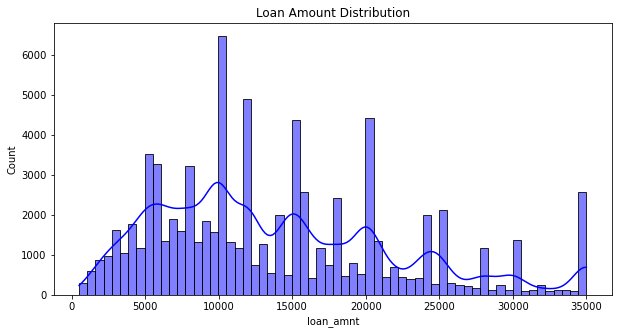

In [10]:
# Visualize the distribution of loan amounts
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['loan_amnt'], kde=True, color='blue')
plt.title('Loan Amount Distribution')
plt.show()

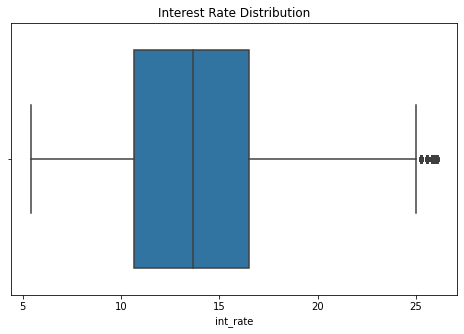

In [11]:
# Visualize the boxplot for interest rates
plt.figure(figsize=(8, 5))
sns.boxplot(x= data_cleaned['int_rate'])
plt.title('Interest Rate Distribution')
plt.show()

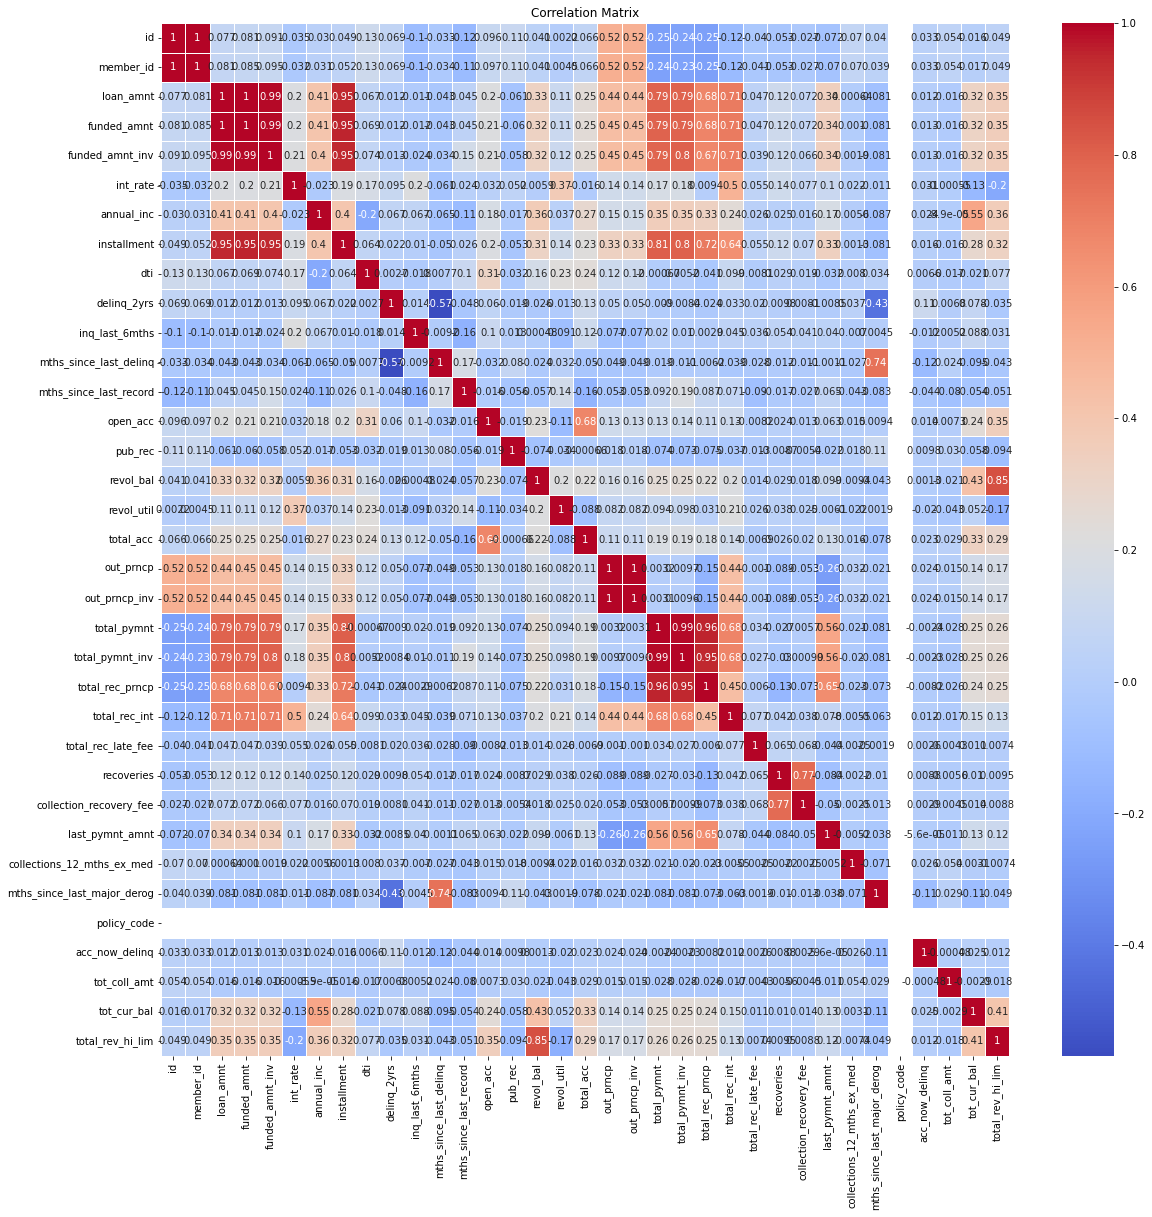

In [12]:
# Correlation Matrix to understand relationships between numeric variables
plt.figure(figsize=(19, 19))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [13]:
# Convert 'emp_length' to numeric 
def convert_emp_length(emp_length):
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return float(emp_length.split()[0]) if isinstance(emp_length, str) else np.nan

data_cleaned['emp_length'] = data_cleaned['emp_length'].apply(convert_emp_length)

In [14]:
# Convert 'term' to a numeric value (e.g., '36 months' -> 36)
data_cleaned['term'] = data_cleaned['term'].apply(lambda x: int(x.split()[0]))

# Handle any other feature engineering as needed, like scaling or encoding categorical columns
# For instance, encoding 'grade' and 'sub_grade' as ordinal categories:
data_cleaned['grade'] = data_cleaned['grade'].apply(lambda x: ord(x) - ord('A'))

Data Visualization

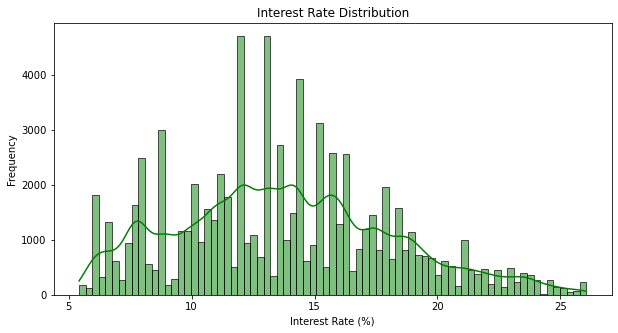

In [15]:
# Visualize Interest Rate Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['int_rate'], kde=True, color='green')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

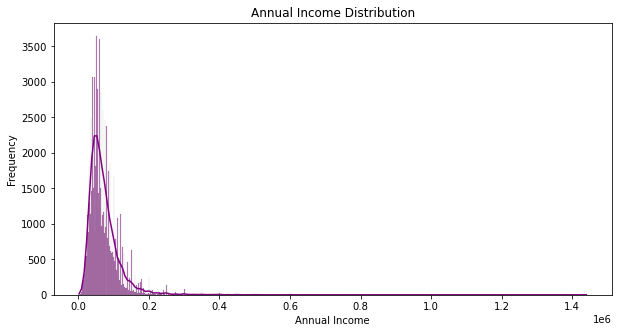

In [16]:
# Visualize Annual Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['annual_inc'], kde=True, color='purple')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

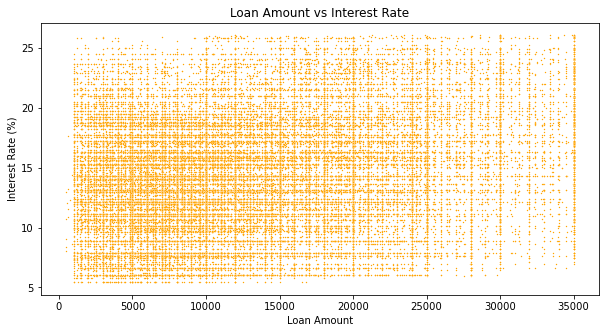

In [17]:
# Scatter plot of Loan Amount vs Interest Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x='loan_amnt', y='int_rate', data=data_cleaned, color='orange', s = 2)
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()

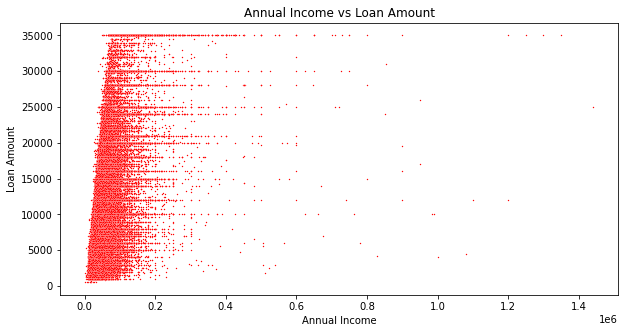

In [18]:
# Scatter plot of Annual Income vs Loan Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=data_cleaned, color='red', s = 2)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

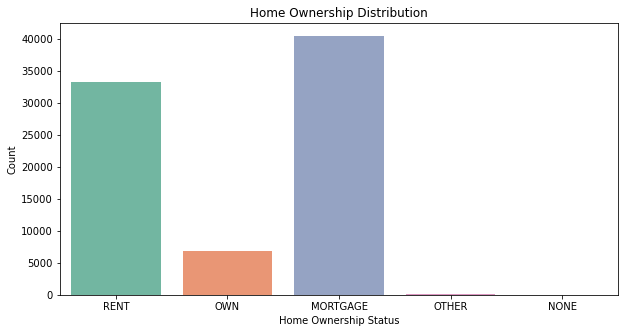

In [19]:
# Bar plot for Home Ownership categories
plt.figure(figsize=(10, 5))
sns.countplot(x='home_ownership', data=data_cleaned, palette='Set2')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.show()

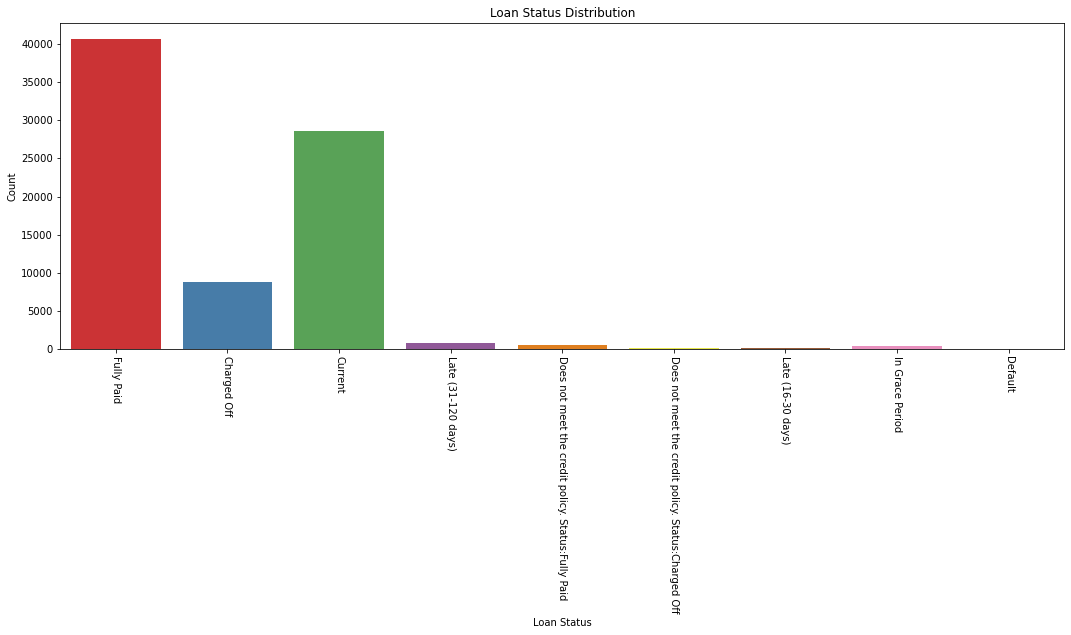

In [20]:
# Bar plot for Loan Status categories
plt.figure(figsize=(18, 6))
sns.countplot(x='loan_status', data=data_cleaned, palette='Set1')
plt.title('Loan Status Distribution')
plt.xticks(rotation=270)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [21]:
# Check for Missing and Infinite Values

# Check for missing values (NaNs) across all columns
print("Missing values per column:")
print(data_cleaned.isnull().sum())

# Check for infinite values (only on numeric columns)
numeric_cols = data_cleaned.select_dtypes(include=[np.number])  # Select only numeric columns

# Check for infinite values in numeric columns
print("Infinite values per column in numeric columns:")
print(np.isinf(numeric_cols).sum())

Missing values per column:
term                               0
grade                              0
sub_grade                          0
emp_length                      3211
home_ownership                     0
verification_status                0
loan_status                        0
pymnt_plan                         0
initial_list_status                0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
annual_inc                         0
installment                        0
dti                                0
delinq_2yrs                       10
inq_last_6mths                    10
mths_since_last_delinq         45739
mths_since_last_record         72335
open_acc                          10
pub_rec                           10
revol_bal                          0
revol_util                        76
total_acc  

In [22]:
# Replace infinite values with NaN in numeric columns
data_cleaned[numeric_cols.columns] = data_cleaned[numeric_cols.columns].replace([np.inf, -np.inf], np.nan)

# Handle missing values for numeric columns (apply mean only to numeric columns)
data_cleaned[numeric_cols.columns] = data_cleaned[numeric_cols.columns].fillna(data_cleaned[numeric_cols.columns].mean())

# Handle missing values for categorical columns (apply mode only to categorical columns)
categorical_cols = data_cleaned.select_dtypes(include=['object'])
data_cleaned[categorical_cols.columns] = data_cleaned[categorical_cols.columns].fillna(data_cleaned[categorical_cols.columns].mode().iloc[0])

Data Preparation for Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Define target variable ('loan_status') and features
# Assuming 'loan_status' is binary or categorical 
target = 'loan_status'
X = data_cleaned.drop(columns=[target])  # Drop target variable from features
y = data_cleaned[target]

In [25]:
# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X)

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Standardize numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modeling

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

1. Random Forest Classifier

In [29]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = clf.predict(X_test_scaled)

# Calculate accuracy (rounded to 2 decimal places)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f'Random Forest Classifier accuracy: {round(accuracy_rf, 2)}%')

Random Forest Classifier accuracy: 97.56%


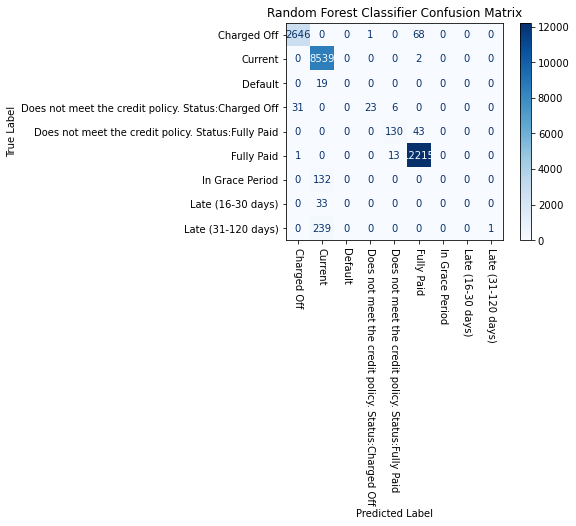

Random Forest Classifier Classification Report:
                                                     precision    recall  f1-score   support

                                        Charged Off       0.99      0.97      0.98      2715
                                            Current       0.95      1.00      0.98      8541
                                            Default       1.00      0.00      0.00        19
Does not meet the credit policy. Status:Charged Off       0.96      0.38      0.55        60
 Does not meet the credit policy. Status:Fully Paid       0.87      0.75      0.81       173
                                         Fully Paid       0.99      1.00      0.99     12229
                                    In Grace Period       1.00      0.00      0.00       132
                                  Late (16-30 days)       1.00      0.00      0.00        33
                                 Late (31-120 days)       1.00      0.00      0.01       240

                    

In [30]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create and plot the Confusion Matrix
cm_display_rf = ConfusionMatrixDisplay(cm_rf, display_labels=clf.classes_)
cm_display_rf.plot(cmap='Blues')
plt.xticks(rotation=270)

# Add titles and axis labels
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

# Generate the classification report with zero_division parameter
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Print the Classification Report
print("Random Forest Classifier Classification Report:")
print(report_rf)

2. Decision Tree Classifier

In [31]:
# Initialize the Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = clf_dt.predict(X_test_scaled)

# Calculate accuracy (rounded to 2 decimal places)
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f'Decision Tree Classifier accuracy: {round(accuracy_dt, 2)}%')

Decision Tree Classifier accuracy: 95.65%


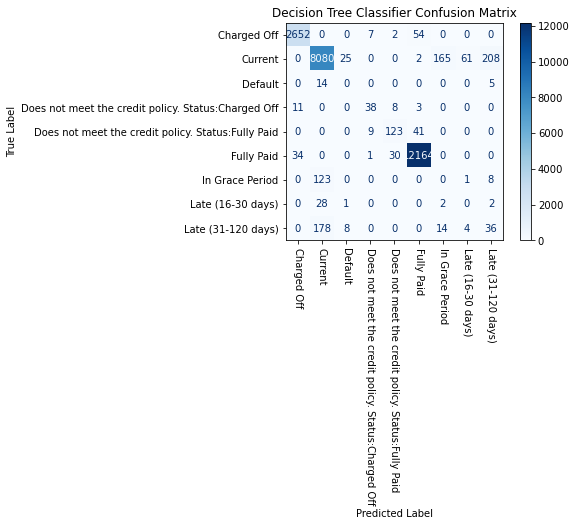

Decision Tree Classifier Classification Report:
                                                     precision    recall  f1-score   support

                                        Charged Off       0.98      0.98      0.98      2715
                                            Current       0.96      0.95      0.95      8541
                                            Default       0.00      0.00      0.00        19
Does not meet the credit policy. Status:Charged Off       0.69      0.63      0.66        60
 Does not meet the credit policy. Status:Fully Paid       0.75      0.71      0.73       173
                                         Fully Paid       0.99      0.99      0.99     12229
                                    In Grace Period       0.00      0.00      0.00       132
                                  Late (16-30 days)       0.00      0.00      0.00        33
                                 Late (31-120 days)       0.14      0.15      0.14       240

                    

In [32]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create and plot the Confusion Matrix
cm_display_dt = ConfusionMatrixDisplay(cm_dt, display_labels=clf_dt.classes_)
cm_display_dt.plot(cmap='Blues')
plt.xticks(rotation=270)

# Add titles and axis labels
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

# Generate the classification report with zero_division parameter
report_dt = classification_report(y_test, y_pred_dt, zero_division=1)

# Print the Classification Report
print("Decision Tree Classifier Classification Report:")
print(report_dt)

3. Logistic Regression Classifier

In [33]:
# Initialize the Logistic Regression Classifier
clf_lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier
clf_lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(X_test_scaled)

# Calculate accuracy (rounded to 2 decimal places)
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f'Logistic Regression Classifier accuracy: {round(accuracy_lr, 2)}%')

Logistic Regression Classifier accuracy: 96.79%


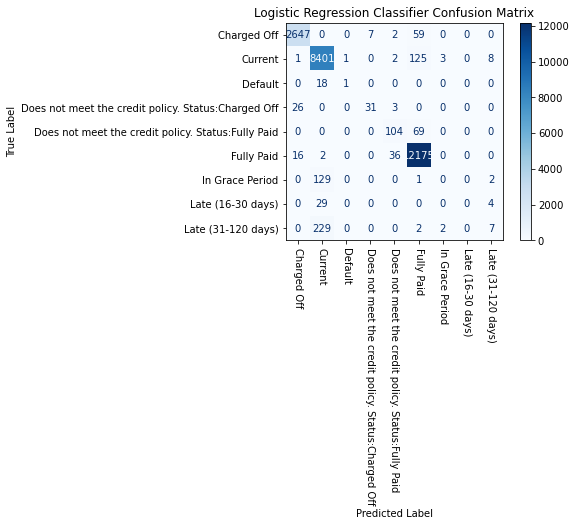

Logistic Regression Classifier Classification Report:
                                                     precision    recall  f1-score   support

                                        Charged Off       0.98      0.97      0.98      2715
                                            Current       0.95      0.98      0.97      8541
                                            Default       0.50      0.05      0.10        19
Does not meet the credit policy. Status:Charged Off       0.82      0.52      0.63        60
 Does not meet the credit policy. Status:Fully Paid       0.71      0.60      0.65       173
                                         Fully Paid       0.98      1.00      0.99     12229
                                    In Grace Period       0.00      0.00      0.00       132
                                  Late (16-30 days)       1.00      0.00      0.00        33
                                 Late (31-120 days)       0.33      0.03      0.05       240

              

In [34]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create and plot the Confusion Matrix
cm_display_lr = ConfusionMatrixDisplay(cm_lr, display_labels=clf_lr.classes_)
cm_display_lr.plot(cmap='Blues')
plt.xticks(rotation=270)

# Add titles and axis labels
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

# Generate the classification report with zero_division parameter
report_lr = classification_report(y_test, y_pred_lr, zero_division=1)

# Print the Classification Report
print("Logistic Regression Classifier Classification Report:")
print(report_lr)

Random Forest Classifier accuracy: 97.56%
Decision Tree Classifier accuracy: 95.65%
Logistic Regression Classifier accuracy: 96.79%

Model Performance Summary:
                 Model  Accuracy (%)
0        Random Forest         97.56
1        Decision Tree         95.65
2  Logistic Regression         96.79


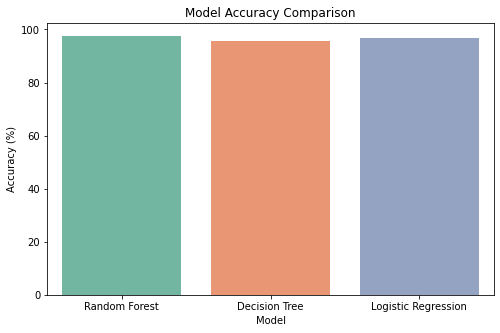


Conclusion:
The best performing model is Random Forest with an accuracy of 97.56%.


In [35]:
# Reporting and Conclusion

# Compare model accuracies
print(f"Random Forest Classifier accuracy: {round(accuracy_rf, 2)}%")
print(f"Decision Tree Classifier accuracy: {round(accuracy_dt, 2)}%")
print(f"Logistic Regression Classifier accuracy: {round(accuracy_lr, 2)}%")

# Create a summary DataFrame to compare metrics
accuracy_data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression'],
    'Accuracy (%)': [round(accuracy_rf, 2), round(accuracy_dt, 2), round(accuracy_lr, 2)]
}

accuracy_df = pd.DataFrame(accuracy_data)
print("\nModel Performance Summary:")
print(accuracy_df)

# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy (%)', data=accuracy_df, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()

# Conclusion
print("\nConclusion:")
best_model = accuracy_df.loc[accuracy_df['Accuracy (%)'].idxmax(), 'Model']
best_accuracy = accuracy_df['Accuracy (%)'].max()
print(f"The best performing model is {best_model} with an accuracy of {best_accuracy}%.")

In [36]:
# Export the cleaned dataset to a CSV file
data_cleaned.to_csv('Cleaned_CreditRisk_Loan.csv', index=False)

print("Cleaned dataset exported successfully!")

Cleaned dataset exported successfully!
